# Project 2: Titanic Data Set

## 1. Question

Here are some questions I came up with by looking over the data set: 
* What are the some demographics of all passengers on board in terms of gender, age, and class? What are the age and gender demographics within each class?
* How does the fare paid correlate with survival rate? Do those who paid a higher price have a better chance at surviving? (Answered in V.)
* How did age affect proportion of survivors within each class? (Answered in I.)
* Which deck had the highest proportion of survived passengers? What was the average fare paid on each deck? (Answered in II.)
* What was the size of the biggest family on board? How many of the family survived the journey? (Answered in III.) 
* Is there a correlation between class and fare paid? (Answered in IV.)

## 2. Wrangle

I will first load the data from the csv file into a Panda's data frame and print out the first few rows. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### i. Investigating NaN values in the data

Looking over the data I immediately noticed some values are missing. For instance, the first passenger's cabin number is NaN. I realize this could cause analysis difficulty later on. In order to figure which data is incomplete, I used Panda's count() function which returns the number of non-None/NaN values in each column. 

In [2]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

From the PassengerId column I know there are 891 passengers in the data set. I can see 714 of those passengers have age information, only 204 have a cabin and 2 passengers are missing the port from which they embarked. The rest of the information is complete. As I plan to investigate both cabin and age, missing values will be problematic. Thus, I will create two separate Data Frames to exlude NaN values for age and cabin to use in all my analysis that includes cabin and/or age values. For a lot of my analysis on gender, class and fare, I expect I can still use the full data. 

In [3]:
titanic_data_valid_age = titanic_data[pd.notnull(titanic_data['Age'])]
titanic_data_valid_cabin = titanic_data[pd.notnull(titanic_data['Cabin'])]

### ii. Investigating passengers with 0.0 Fare amount

I also notice that although none of the Fare values are NaN, some are 0.0. It is surprising to me as I didn't expect a passenger could ride for free. I decided to find all such passengers to investigate further. I created a list called free_riders and appended to it all those with Fare = 0.0. 

In [4]:
free_riders = []
for index, passenger in titanic_data.iterrows():
    if passenger['Fare'] == 0:
        free_riders.append(passenger)
print pd.DataFrame(free_riders)[['Pclass','Sex','Age','Survived', 'Parch','SibSp', 'Ticket', 'Cabin', 'Embarked']]

     Pclass   Sex   Age  Survived  Parch  SibSp  Ticket Cabin Embarked
179       3  male  36.0         0      0      0    LINE   NaN        S
263       1  male  40.0         0      0      0  112059   B94        S
271       3  male  25.0         1      0      0    LINE   NaN        S
277       2  male   NaN         0      0      0  239853   NaN        S
302       3  male  19.0         0      0      0    LINE   NaN        S
413       2  male   NaN         0      0      0  239853   NaN        S
466       2  male   NaN         0      0      0  239853   NaN        S
481       2  male   NaN         0      0      0  239854   NaN        S
597       3  male  49.0         0      0      0    LINE   NaN        S
633       1  male   NaN         0      0      0  112052   NaN        S
674       2  male   NaN         0      0      0  239856   NaN        S
732       2  male   NaN         0      0      0  239855   NaN        S
806       1  male  39.0         0      0      0  112050   A36        S
815   

I noticed a few things above these "free riders" - they are all male and they all embarked from Southampton. Also all these passengers were traveling alone since Parch and SibSp values are false. I researched online but could not find an explanation for why some passengers rode for free. I decided to exclude them from any analysis regarding the fare. I created a new data frame I called paid_passengers that only included non-zero Fare. 

In [5]:
paid_passengers = titanic_data[titanic_data.Fare != 0]

# 3. Explore $\rightarrow$ Conclude $\rightarrow$ Visualize

## $\boxed{\text{I. Age vs. Proportion of Survivors in Each Class}}$

First, I decided to group all passengers by age and class. Instead of grouping by every age value, I researched a way to group by a range of values using Panda's _cut()_ function. I computed the _min()_ and _max()_ of ages getting 0.42 and 80 respectively. I then grouped by ages: (0,10],(10,20],(20,30],(30,40],(40,50],(50,60],(60,70],(70,80] and used the _size()_ function to see how many passengers are in each class-age category.

In [6]:
print 'Min: {}  Max: {}'.format(titanic_data['Age'].min(), titanic_data['Age'].max())

Min: 0.42  Max: 80.0


In [7]:
groupby_age_total = titanic_data.groupby([pd.cut(titanic_data['Age'], [0,10,20,30,40,50,60,70,80]), 'Pclass']).size()
print groupby_age_total

Age       Pclass
(0, 10]   1           3
          2          17
          3          44
(10, 20]  1          18
          2          18
          3          79
(20, 30]  1          40
          2          61
          3         129
(30, 40]  1          49
          2          43
          3          63
(40, 50]  1          37
          2          19
          3          30
(50, 60]  1          25
          2          12
          3           5
(60, 70]  1          11
          2           3
          3           3
(70, 80]  1           3
          3           2
dtype: int64


Here is a visual distribution of ages in each class.

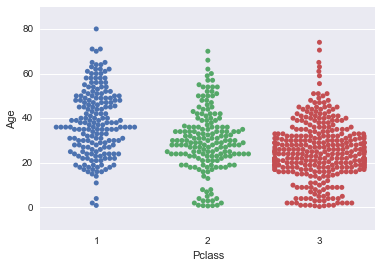

In [8]:
sns.swarmplot(x='Pclass', y='Age', data=titanic_data)

Next, I am curious about the proportion of passengers who survived in each category above. To compute this I need to add up the number of true 'Survived' values in each group and then divide by the total values computed above. 

In [9]:
groupby_age_survived = titanic_data.groupby([pd.cut(titanic_data['Age'], [0,10,20,30,40,50,60,70,80]), 'Pclass']).sum()\
                    ['Survived']
age_class_survival_pr = groupby_age_survived/groupby_age_total
print age_class_survival_pr

Age       Pclass
(0, 10]   1         0.666667
          2         1.000000
          3         0.431818
(10, 20]  1         0.833333
          2         0.500000
          3         0.253165
(20, 30]  1         0.725000
          2         0.409836
          3         0.232558
(30, 40]  1         0.755102
          2         0.441860
          3         0.206349
(40, 50]  1         0.567568
          2         0.526316
          3         0.066667
(50, 60]  1         0.600000
          2         0.166667
          3         0.000000
(60, 70]  1         0.181818
          2         0.333333
          3         0.333333
(70, 80]  1         0.333333
          2              NaN
          3         0.000000
dtype: float64


From the proportions above I notice that every child aged (0,10] in class 2 survived and none of the class 3 passengers aged (70,80] survived. I expected to get NaN for class 2 passengers aged (70,80] since there aren't any - so I divided by 0. By looking at the result above I can see that being in the first class didn't necessarily improve chances of survial for all ages. For age < 10 and > 60, there doesn't appear to be a signifact advantage of being in a higher class.

Next I plotted age group vs. survival rate for each of the three classes. My function analyze_age_class() creates a new dataframe with only passengers from one of the classes. Then I group each class by age as I did above to the entire data and found the proportion of survivers in that class. Then I plotted the proportion for each age in that class. Calling the function for each class, I get the following result. 

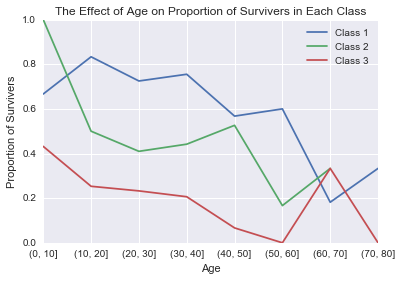

In [10]:
def analyze_age_class(Pclass):
    current_Pclass = titanic_data[titanic_data['Pclass'] == Pclass] #uses boolean indexing
    prop_survived = current_Pclass.groupby(pd.cut(current_Pclass['Age'], [0,10,20,30,40,50,60,70,80])).sum()['Survived']\
    /current_Pclass.groupby(pd.cut(current_Pclass['Age'], [0,10,20,30,40,50,60,70,80])).size()
    prop_survived.plot()

for i in range(3):
    analyze_age_class(i+1) #graphs age vs. proportion line for classes 1,2,3

plt.title("The Effect of Age on Proportion of Survivers in Each Class")
plt.ylabel("Proportion of Survivers")
plt.legend(['Class 1','Class 2','Class 3'])

From the graph I can see visually what I concluded earlier, that is, for age less than 10 or greater than 60 being in a higher class does not increase proprotion of surviving passengers. 

## $\boxed{\text{II. Investigating Cabins/Decks}}$

Although data on passenger's cabin is limited, I would still like to explore it. I will take the modified titanic_data_valid_cabin that exludes NaN cabins and add another column that I will call 'Deck'. In order to do this I used the map() function to map each 'Cabin' value to it's first letter, which is the deck. 

In [11]:
def cabin_to_deck(cabin):
    return cabin[0]

titanic_data_valid_cabin['Deck'] = titanic_data_valid_cabin['Cabin'].map(cabin_to_deck)

/Users/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


First, I am curious about how many passengers where on each deck.

Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
dtype: int64


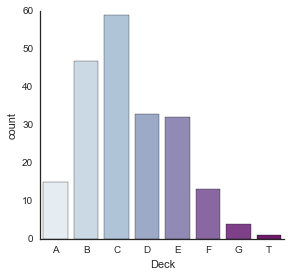

In [12]:
sns.set(style="white")

print titanic_data_valid_cabin.groupby('Deck').size()
sns.factorplot(x='Deck', data=titanic_data_valid_cabin, kind='count', \
               order=['A','B','C','D','E','F','G','T'], palette='BuPu')

Next I wanted to look into how many men and women were on each deck.

Deck  Sex   
A     female     1
      male      14
B     female    27
      male      20
C     female    27
      male      32
D     female    18
      male      15
E     female    15
      male      17
F     female     5
      male       8
G     female     4
T     male       1
dtype: int64


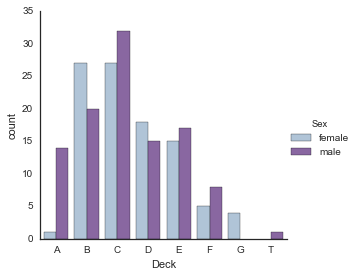

In [13]:
print titanic_data_valid_cabin.groupby(['Deck', 'Sex']).size()
sns.factorplot(x='Deck', hue='Sex', data=titanic_data_valid_cabin, kind='count', \
               order=['A','B','C','D','E','F','G','T'], palette='BuPu')

Next I wanted to see how much fare passengers on each deck paid. I found the mean fare on each deck. Then I plotted the data for each deck as boxplots side by side. 

Deck
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
Name: Fare, dtype: float64


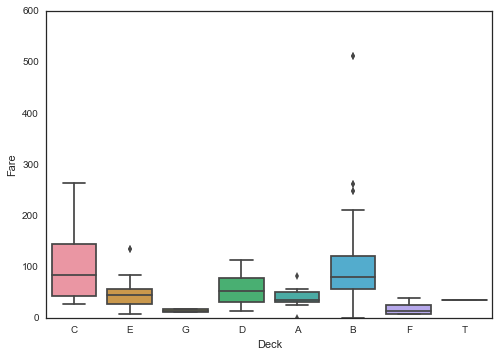

In [14]:
print titanic_data_valid_cabin.groupby('Deck').mean()['Fare']
sns.boxplot(x='Deck', y='Fare', data=titanic_data_valid_cabin)

I conclude that passengers on deck B paid the most fare on average, closely followed by deck C. The least expensive deck was deck G. This is contrary to my belief that deck A would be most expensive and deck T least expensive. Lastly I want to look at proportion of survivors passengers on each deck. 

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
dtype: float64


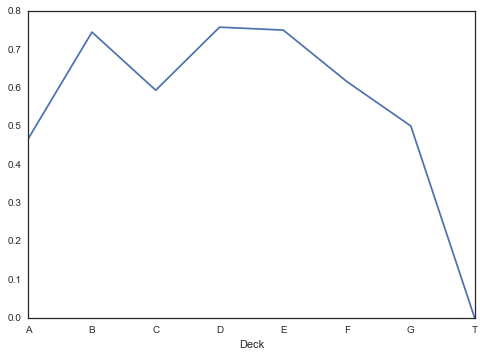

In [15]:
survived_on_deck = titanic_data_valid_cabin.groupby('Deck').sum()['Survived']\
        /titanic_data_valid_cabin.groupby('Deck').size()
print survived_on_deck
survived_on_deck.plot()

I conclude (based on limited data available) that the highest proportion of survivers was on deck D closely followed by Decks B and E. 

## $\boxed{\text{III. Biggest Family}}$

My first thought is to eliminate those passengers whose SipSp or ParCh value is 0, meaning they were traveling alone. To do this I will create a subset of the original data set. I called this subset titanic_data_family:

In [16]:
titanic_data_family = titanic_data[(titanic_data['SibSp'] != 0) | (titanic_data['Parch'] != 0)]
print len(titanic_data_family)

354


I found out that there were 354 passengers out of 891 that were not traveling alone. I am going to graph the number passengers traveling with sibling/spouse and parent/child.

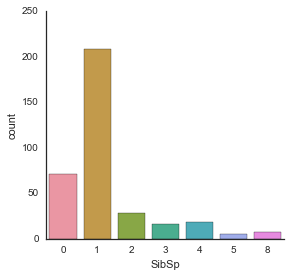

In [17]:
sns.factorplot(x='SibSp', data=titanic_data_family, kind='count')

I can see that a lot of passengers had 1 sibling/spouse, I assume the reason for this is in fact that most passengers had 1 spouse on board. Since one cannot have more than 1 spouse, any 'Parch' value above 1 would indicate the passenger had siblings on board. The highest 'Parch' value is 8 which means the passenger either had 8 siblings or a spouse and 7 siblings. (Note: siblings can be stepsiblings)

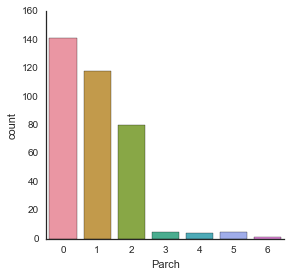

In [18]:
sns.factorplot(x='Parch', data=titanic_data_family, kind='count')

I can see that the maximum number of children is 6 (since one cannot have more than 2 parents and 'Parch' value above 2 should indicate having children). Next I want to find the number of people in the biggest family on board. To do this I will find the biggest sum of 'SibSp' and 'Parch' columns amongst passengers. 

In [19]:
(titanic_data_family['SibSp'] + titanic_data_family['Parch']).max()

10

I wish to find this family. I will create a new dataframe for just members of this family which I will call titanic_largest_family. 

In [20]:
titanic_largest_family = titanic_data_family[titanic_data_family['SibSp'] + titanic_data_family['Parch'] == 10]
titanic_largest_family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Somethig seems off immediately because I see an 8 in 'SibSp' meaning each of these passengers had 8 siblings on board, so there should be 9 children from the Sage family. However I only see 7 children here, so 2 appear to be missing. Furthermore each of the Sage children has a 2 in the 'Parch' column which means both of their parents were on board. I attempt to find their parents next using the last name 'Sage'. I will actually print all the passengers with last name 'Sage':  

In [21]:
titanic_data[['Sage,' in name for name in titanic_data['Name']]]  #all passengers with 'Sage,' in their name

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


I am seeing just the seven children again which leads me to believe that the parents and two other children are missing from this data. I looked up the number of passengers on board of Titanic and I found that there were 1,317, meaning our data is incomplete. Nevertheless for my analysis I conclude that the largest family was the Sage family with 2 parents and 9 children. None of the children in our data survived. I researched this family and found that sadly, no one in the family survived the journey. I am unable to find a good way to provide a visual of this data, so I will just add the picture of the family for this section.

<img src="SageFamilie.png">

## $\boxed{\text{IV. Class and Fare Paid}}$

Next, I will analyze fare paid by passengers. For all my analysis I will use paid_passengers() dataframe which excludes any passengers that rode for free. I start by computing some basic statistics about 'Fare'.

In [22]:
paid_passengers['Fare'].describe() #statistics about the fare passengers paid

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

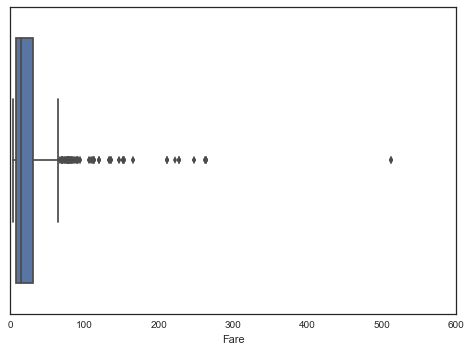

In [23]:
sns.boxplot(y='Fare', data=paid_passengers, orient = 'h')

I can see the standard deviation is very high and there is a big gap in price between the max and min. I am first curious about how different these statistics are for men and women. 

In [40]:
paid_passengers[paid_passengers['Sex'] == 'female'].describe()['Fare']

count    314.000000
mean      44.479818
std       57.997698
min        6.750000
25%       12.071875
50%       23.000000
75%       55.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
paid_passengers[paid_passengers['Sex'] == 'male'].describe()['Fare']

count    562.000000
mean      26.205136
std       43.506123
min        4.012500
25%        7.895800
50%       12.312500
75%       27.720800
max      512.329200
Name: Fare, dtype: float64

I can see that the maximum of 512.329200 appears in both female and male passengers. The mean for females at 44.479818 is smaller than that of males at 26.205136. Next I provide a violin plot of fare for males and females side by side. 

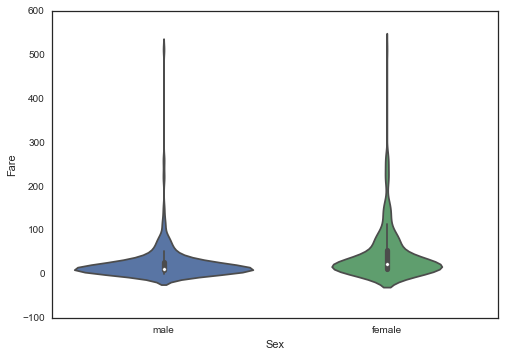

In [26]:
sns.violinplot(x = 'Sex', y = 'Fare', data= titanic_data)

In [27]:
paid_passengers.groupby(['Sex','Pclass']).mean()['Fare']

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          70.099038
        2          20.903064
        3          12.809290
Name: Fare, dtype: float64

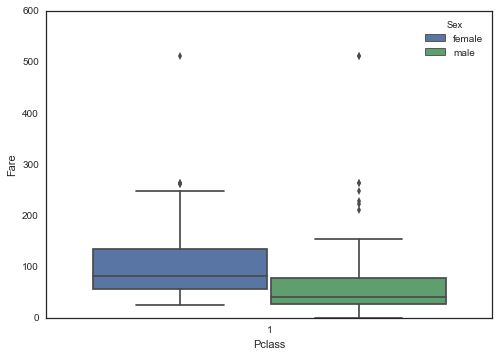

In [28]:
sns.boxplot(y = 'Fare', hue = 'Sex', x = 'Pclass', data= titanic_data[titanic_data['Pclass'] == 1])

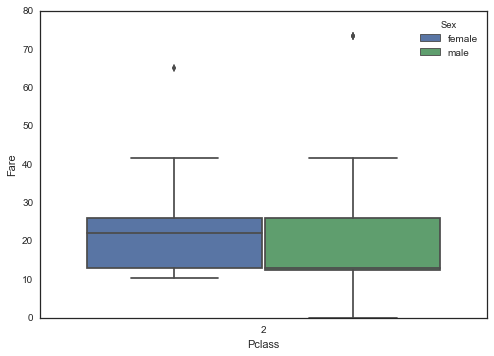

In [29]:
sns.boxplot(y = 'Fare', hue = 'Sex', x = 'Pclass', data= titanic_data[titanic_data['Pclass'] == 2])

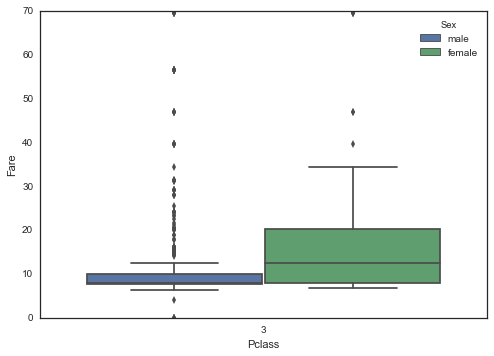

In [30]:
sns.boxplot(y = 'Fare', hue = 'Sex', x = 'Pclass', data= titanic_data[titanic_data['Pclass'] == 3])

I can now conclude that female passengers paid more than males regardless of class. Finally I will groupy by Pclass alone.

In [31]:
paid_passengers.groupby('Pclass').mean()['Fare']

Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64

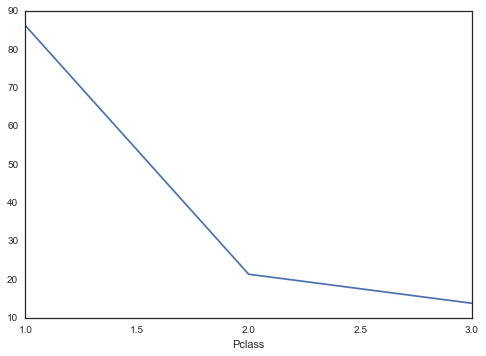

In [32]:
paid_passengers.groupby('Pclass').mean()['Fare'].plot()

I observe a correlation - 1st class appears to pay more than 3rd class, so I think there must be a negative relationship between class and fare. I am going to compute Pearson's r coefficient using the formula showed in video lectures: 
$$r = \frac{\sum Z_{xi} \cdot Z_{yi}}{N}$$ where $$Z_{xi} = \frac{X_i - \bar{X}}{STD_x}\text{      and      } Z_{yi} = \frac{Y_i - \bar{Y}}{STD_y}$$

In [33]:
def standardize(x):
    return (x - x.mean())/x.std()  #gives number of std away from the mean for each x_i

(standardize(paid_passengers['Fare'])*standardize(paid_passengers['Pclass'])).mean() #calculates Pearson's r

-0.5608762515192894

I see that there is a negative correlation, as I expected since the smaller the class the bigger I expect fare to be. The correlation is not very strong (I am assuming this is because there are some outliers). I am going to plot the fares using boxplot() to see what's going on. I plot all three boxplots on the same figure first and then just second and third class second. 

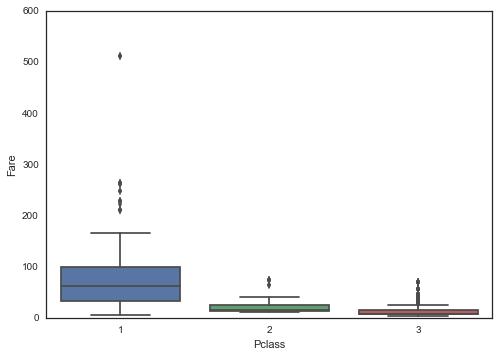

In [34]:
sns.boxplot(x = "Pclass", y = "Fare", data=paid_passengers)

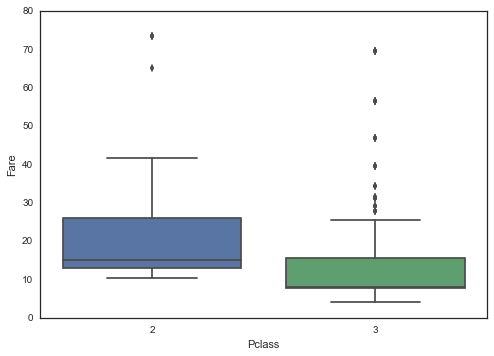

In [35]:
sns.boxplot(x = "Pclass", y = "Fare", data=paid_passengers[paid_passengers['Pclass'] != 1])

From the comparison between 2nd and 3rd class, I can see that even though the mean of 3rd class is less than the mean of 2nd class, there are a lot of outliers, which are the reason for a weak correlation between fare and class. 

## $\boxed{\text{V. Fare vs. Proportion of Survivors}}$

I am going to analyze whether paying a higher fare within each class increased or decreased proportion of survivors. Similarly to how I analyzed age above, I am going to break 'Fare' into 'bins'. I am first going to get a sense for what the maximum 'Fare' paid was in each class. 

In [36]:
paid_passengers.groupby('Pclass').max()['Fare']

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

Now that I know this, I decided to group into the following bins: [0,25,50,75,100,200,600]. 

In [37]:
paid_passengers.groupby(['Pclass', pd.cut(paid_passengers['Fare'], [0,25,50,75,100,200,600])]).size()

Pclass  Fare      
1       (0, 25]         1
        (25, 50]       71
        (50, 75]       42
        (75, 100]      44
        (100, 200]     33
        (200, 600]     20
2       (0, 25]       110
        (25, 50]       61
        (50, 75]        7
3       (0, 25]       431
        (25, 50]       42
        (50, 75]       14
dtype: int64

Now I am going to use a function analyze_fare() to calculate and plot the proportion of survivors for each class for each range of fares above.

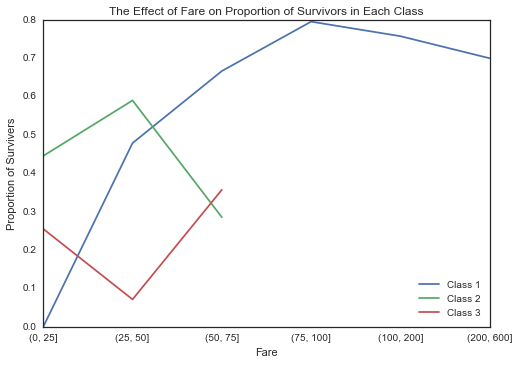

In [38]:
def analyze_fare(Pclass, bins):
    current_Pclass = paid_passengers[paid_passengers['Pclass'] == Pclass] #uses boolean indexing
    prop_survived = current_Pclass.groupby(pd.cut(current_Pclass['Fare'], bins)).sum()['Survived']\
    /current_Pclass.groupby(pd.cut(current_Pclass['Fare'], bins)).size()
    prop_survived.plot()
    
analyze_fare(1, [0,25,50,75,100,200,600]) #analyze 1st class fare vs. survival
analyze_fare(2, [0,25,50,75,100,200,600]) #analyze 2nd class fare vs. survival
analyze_fare(3, [0,25,50,75,100,200,600]) #analyze 3rd class fare vs. survival

plt.title("The Effect of Fare on Proportion of Survivors in Each Class")
plt.ylabel("Proportion of Survivers")
plt.legend(['Class 1','Class 2','Class 3'], loc=4)  #place legend in lower right

Based on my results, I conclude that for first class, passengers who paid a higher fare had a larger proprotion of survivors. For 2nd and 3rd class, I don't see any trends other than the fact that overrall there was a larger proportion of survivors in 2nd class than in 3rd class. I realize there are some issues here - some bins, such as 1st class (0,25] only have 1 passenger while 3rd class (0,25] has 431 passengers. So the proportion of survivors in the former is based on the survival of a single individual. 